# Heart Disease UCI

### General information
 This is the Cleveland database which is the only one that has been used by researchers to this date. Though this is an informal data analysis, we still try to find the relationship between the following aspects (e.g: chest pain type, resting blood pressure, etc.) and the occurance of heart disease through this database

### Content

 This database contains:
 <br>
    > 1. age 
    <br>
    > 2. sex 
    <br>
    > 3. chest pain type (4 values) 
    <br>
    > 4. resting blood pressure 
    <br>
    > 5. serum cholestoral in mg/dl 
    <br>
    > 6. fasting blood sugar > 120 mg/dl
    <br>
    > 7. resting electrocardiographic results (values 0,1,2)
    <br>
    > 8. maximum heart rate achieved 
    <br>
    > 9. exercise induced angina 
    <br>
    > 10. oldpeak = ST depression induced by exercise relative to rest 
    <br>
    > 11. the slope of the peak exercise ST segment 
    <br>
    > 12. number of major vessels (0-3) colored by flourosopy 
    <br>
    > 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    <br>
    > 14. target: 0 for not having a heart Disease, 1 for having a heart Disease
    <br>

### source
 https://www.kaggle.com/ronitf/heart-disease-uci

# 1. data exploration

In [42]:
# import the packs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [40]:
# read the data
df = pd.read_csv('heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## from the dataset above, we can guess some ot the relationship of the variable above and the target variable such as:
##### 1. relationship between target and age
##### 2. reltionship between target andsex
##### 3. relationship between target and maxium heart rate achieved
##### 4. relationship between target and fasting blood sugar
##### 5. relationship between target and the slope of the peak exercise ST segment
##### 6. relationship between target and the number of major vessels colored by flourosopy
##### 7. relationship between target and chest pain type
##### 8. relationship between target and serum cholestoral

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


since every columns have 303 entries, the database doesn't contains null values

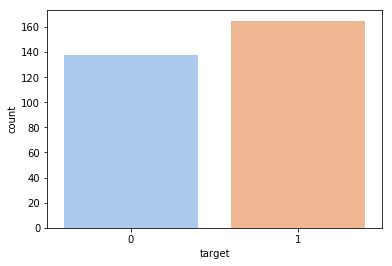

In [5]:
# show the hist of 'target' column
sns.countplot(x="target", data=df, palette="pastel")
plt.show()

In [16]:
perct0 = 0
perct1 = 0
for i in df['target']: 
    if i == 0:
        perct0 += 1 / len(df['target'])
    else:
        perct1 += 1 / len(df['target'])

target = []
target.append(perct0)
target.append(perct1)
print(perct0)
print(perct1)
print(target)

0.4554455445544549
0.5445544554455444
[0.4554455445544549, 0.5445544554455444]


<function matplotlib.pyplot.show(*args, **kw)>

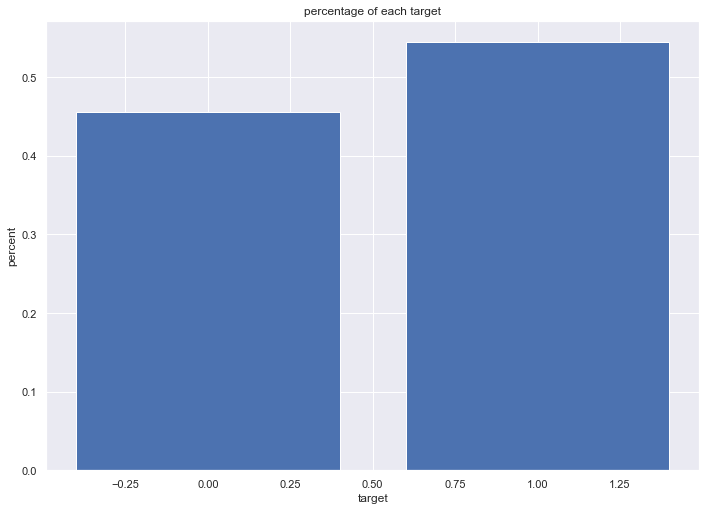

In [17]:
# show the percentage of each target
plt.bar([0,1],target)
plt.title("percentage of each target")
plt.xlabel("target")
plt.ylabel("percent")
plt.show

##### we can see in this dataset, the probability of having a heart disease is approximately 10% more not having a heart disease

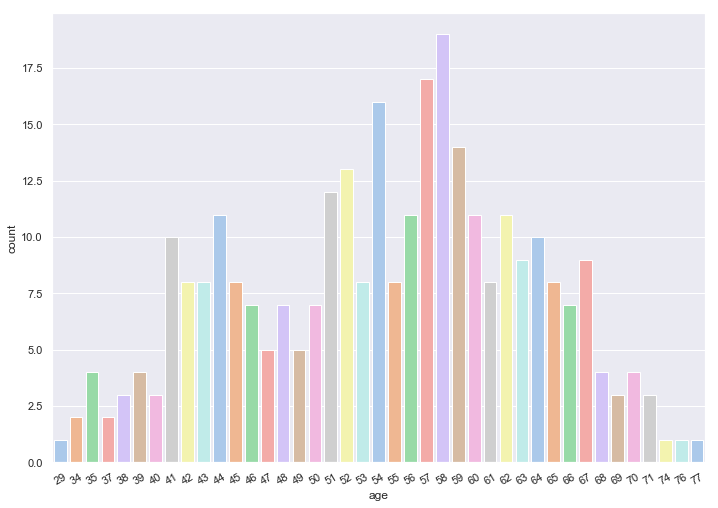

In [11]:
# show the hist of 'age' column
sns.set(rc={'figure.figsize':(11.7,8.27)})
agehist = sns.countplot(x="age", data=df, palette="pastel")
agehist.set_xticklabels(agehist.get_xticklabels(), rotation = 30)
plt.show()

##### we can see that the age of people who are included in this dataset are mostly aged from 41 to 67

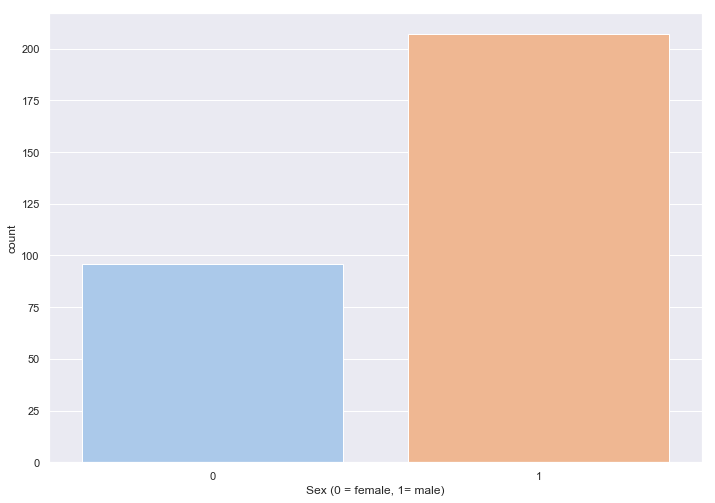

In [19]:
# count the sex
sns.countplot(x="sex", data=df, palette="pastel")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [20]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


##### we can see that most of people who are included in this dataset are male

In [21]:
# find the mean of each column grouped by target
df.groupby("target").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


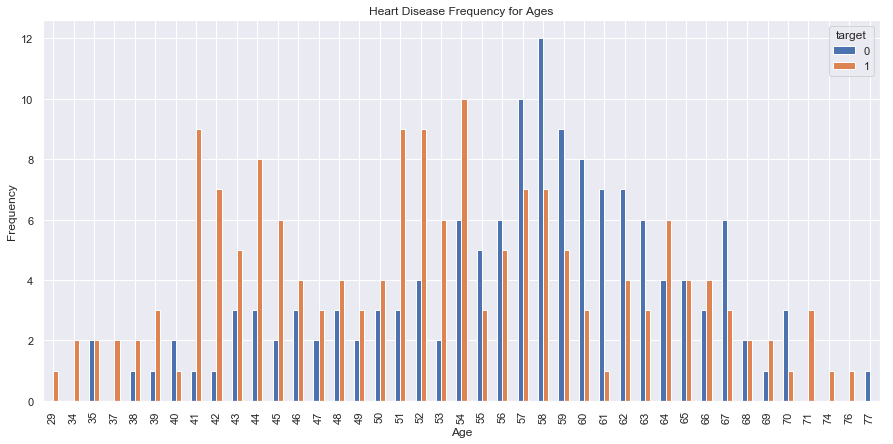

In [23]:
# find the relationship of age and target
pd.crosstab(df.age, df.target).plot(kind="bar",figsize=(15,7))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

##### we can roughly conclude that most of the people's age who are having heart disease are ranged form 41-45 and 51-59

Text(0.5,0,'Sex (0 = female, 1= male)')

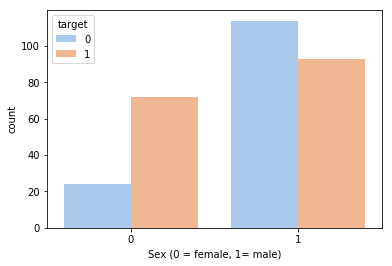

In [43]:
# find the relationship between sex and target
ax = sns.countplot(x = "sex", hue = "target", data=df, palette="pastel")
plt.xlabel("Sex (0 = female, 1= male)")

Text(0,0.5,'maximum heart rate achieved')

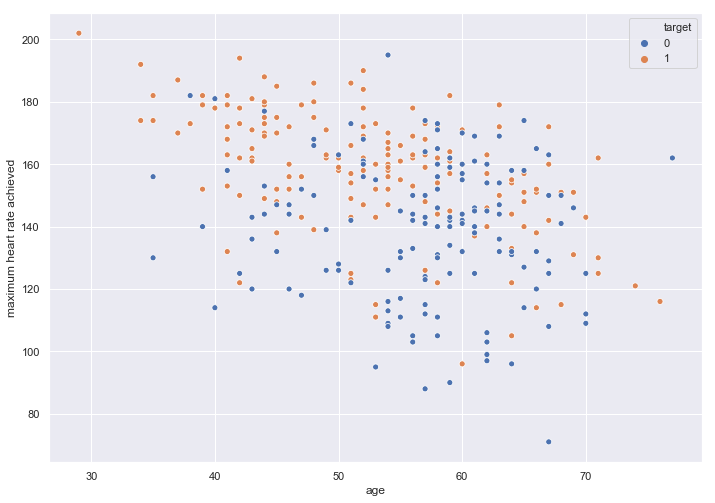

In [36]:
# distribution between age and maximum heart rate achieved
ax = sns.scatterplot(x = "age", y = "thalach", hue = "target", data=df)
plt.ylabel("maximum heart rate achieved")

Text(0,0.5,'frequency')

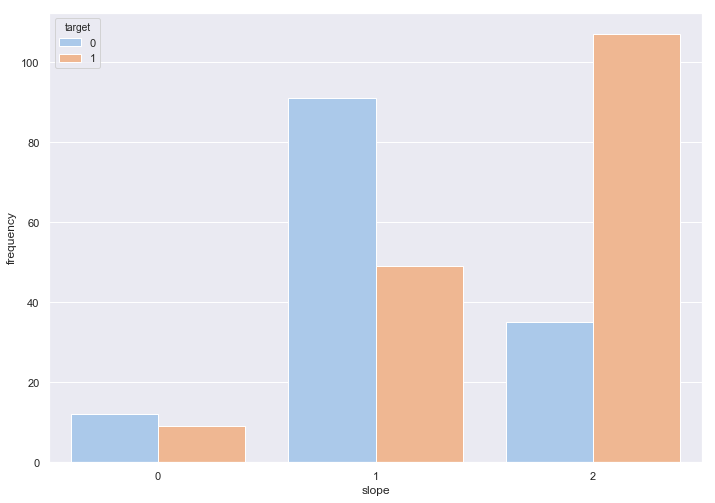

In [37]:
# find relationship between the slope of the peak exercise ST segment 
ax = sns.countplot(x = "slope", hue = "target", data = df, palette="pastel")
plt.ylabel("frequency")

Text(0,0.5,'frequency of whether have disease or not')

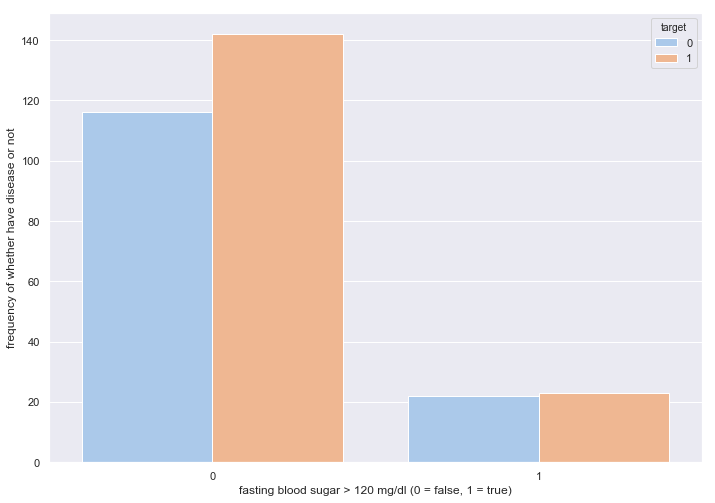

In [38]:
# find relationship between fasting blood sugar and target
ax = sns.countplot(x = "fbs", hue = "target", data = df, palette="pastel")
plt.xlabel("fasting blood sugar > 120 mg/dl (0 = false, 1 = true)")
plt.ylabel("frequency of whether have disease or not")

Text(0.5,0,'number of major vessels colored by flourosopy')

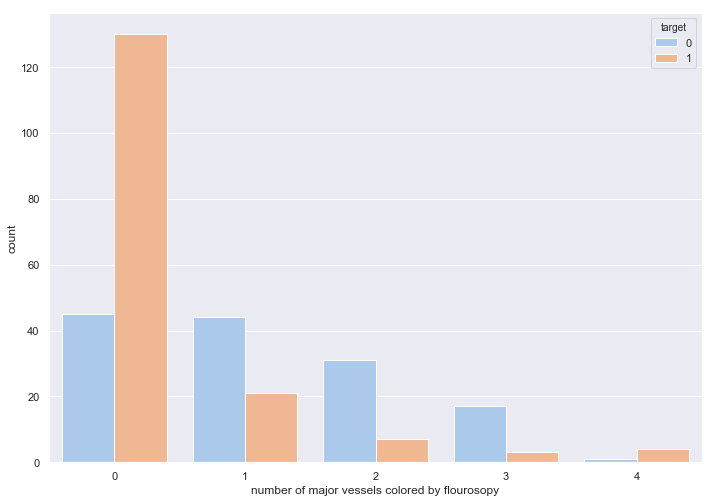

In [46]:
# relationship between number of major vessels colored by flourosopy and target
ax = sns.countplot(x = "ca", hue = "target", data = df, palette="pastel")
plt.xlabel("number of major vessels colored by flourosopy")

Text(0.5,0,'chest pain type')

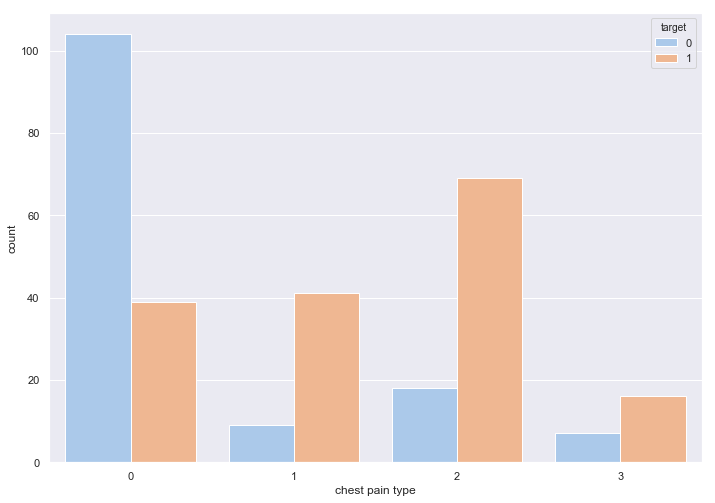

In [47]:
# relationship between target and chest pain type
ax = sns.countplot(x = "cp", hue = "target", data = df, palette="pastel")
plt.xlabel("chest pain type")

Text(0.5,0,'serum cholestoral in mg/dl')

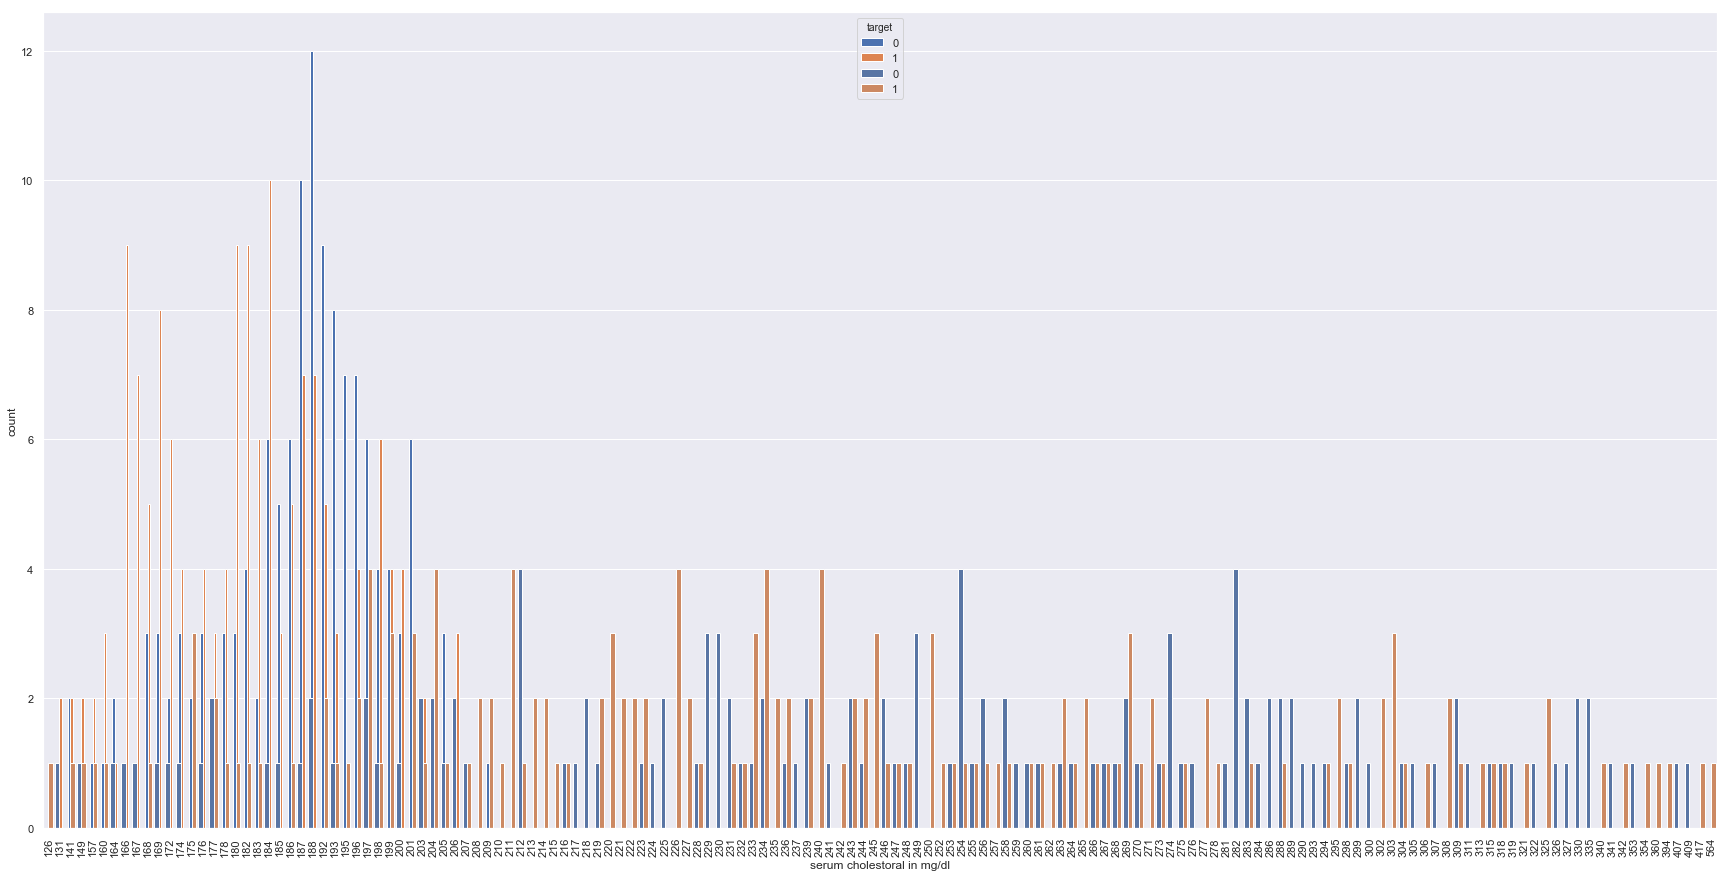

In [48]:
# relationship between target and serum cholestoral
pd.crosstab(df.age, df.target).plot(kind="bar",figsize=(30,15))
ax = sns.countplot(x = "chol", hue = "target", data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.xlabel("serum cholestoral in mg/dl")

##### since this dataset contains categorical variables (e.g: cp, slope), we have to change it into dummy variables 

In [10]:
cpdummie = pd.get_dummies(df['cp'], prefix = "cp")
slopedummie = pd.get_dummies(df['slope'], prefix = "slope")
thaldummie = pd.get_dummies(df['thal'], prefix = "thal")

In [70]:
newframe = [df, cpdummie, thaldummie, slopedummie]
df = pd.concat(newframe, axis=1)
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 22 columns):
age         303 non-null int64
sex         303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
ca          303 non-null int64
target      303 non-null int64
cp_0        303 non-null uint8
cp_1        303 non-null uint8
cp_2        303 non-null uint8
cp_3        303 non-null uint8
thal_0      303 non-null uint8
thal_1      303 non-null uint8
thal_2      303 non-null uint8
thal_3      303 non-null uint8
slope_0     303 non-null uint8
slope_1     303 non-null uint8
slope_2     303 non-null uint8
dtypes: float64(1), int64(10), uint8(11)
memory usage: 29.4 KB


# 2. Linear Regression Analysis

In [71]:
y = df.target.values
x_data = df.drop(["target"], axis = 1)

In [72]:
x_data_train, x_data_test, y_train, y_test = train_test_split(x_data, y, random_state=1)

In [73]:
# divide the data into train and test group
print(x_data_train.shape)
print(y_train.shape)
print(x_data_test.shape)
print(y_test.shape)

(227, 21)
(227,)
(76, 21)
(76,)


In [37]:
# perform linear regression
linreg = LinearRegression()
linreg.fit(x_data_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
print(linreg.intercept_)
print(linreg.coef_)

0.9398773155287015
[-0.00184526 -0.16558785 -0.0018555  -0.00064764  0.0566162   0.06109909
  0.00243222 -0.1290287  -0.06716188 -0.07308923 -0.22146442  0.03723828
  0.04086285  0.14336329 -0.06442141 -0.06521942  0.15612727 -0.02648644
  0.0446102  -0.05672427  0.01211407]


### so the linear relationship between having a heart disease and other variables is (C# as column # in df with dummie variables):
$Y = 0.9398773155287015 - 0.00184526*C1 - 0.16558785*C2 -0.0018555*C3 -0.00064764*c4 + 0.0566162*C5 + 0.06109909*C6 + 0.00243222*C7 -0.1290287*C8 -0.06716188*C9 -0.07308923*C10 -0.22146442*C11 + 0.03723828*C12 + 0.04086285*C13 + 0.14336329*C14 -0.06442141*C15 -0.06521942*C16 +0.15612727*C17 -0.02648644*C18 +0.0446102*C19 -0.05672427*C20 +0.01211407*C21$

#### check how good this linear model is

In [66]:
y_pred = linreg.predict(x_data_test)
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 0.14849111343540952
RMSE: 0.3853454468855309


# 3. Logistic Regression Analysis

In [62]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [63]:
# normal lize the data
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [65]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T